# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 1</span>

### Esercizio 01.1

In questo primo esercizio verificheremo il corretto funzionamento del generatore di numeri casuali che verrà utilizzato in questa e nelle prossime esercitazioni.

**Verifica del valor medio atteso**

È necessario, dunque, verificare che i numeri estratti tramite il generatore abbiano valor medio e varianza corretti (in base alla distribuzione di probabilità da cui vengono estratti). Dato che distribuzioni di probabilità più complesse vengono campionate a partire dal campionamento della distribuzione uniforme sull'intervallo $\left[0,1\right]$, verrà di seguito verificato il corretto funzionamento di quest'ultimo generatore. In particolare, si deve osservare che il valor medio delle estrazioni sia $\langle r\rangle = \int_{0}^{1}rdr =  \frac{1}{2}$.

Per la stima di $\langle r\rangle $ e la sua incertezza, viene usato il metodo del <font color = "red"> data blocking </font>. Esso consiste, su $M$ estrazioni totali, nel prendere $N$ blocchi, ognuno con $L = \frac{M}{N}$ estrazioni, calcolare la media di ognuno e, infine, usare le medie dei blocchi come dati su cui fare le medie progressive. Questo metodo è fondamentale in quanto, qualora le singole misure ottenute fossero correlate, le medie ottenute dai singoli blocchi risultano scorrelate. In questo caso, le misure sono le estrazioni ma, in generarle, possono essere qualsiasi cosa si voglia ottenere come risultato dell'esperimento simulato e, in quel caso, non è detto che sia così semplice accorgersi della presenza di qualche correlazione tra le diverse ripetizioni dell'esperimento.

**Stima dell'incertezza sulla misura** 

Per stimare l'incertezza sulle misure effettuate viene dapprima calcolata la varianza.
$$\sigma^{2} = \langle A^{2} \rangle - \langle A \rangle ^{2}$$
dove 
$$\langle A^{2} \rangle = \frac{1}{N} \sum_{i=1}^{N} A_{i}^{2} \quad \langle A \rangle = \frac{1}{N} \sum_{i=1}^{N} A_{i}$$

Dopodiché è possibile ricavare l'incertezza statistica:
$$\frac{\sigma}{\sqrt{(N - 1)}} = \sqrt{\frac{1}{N -1}\left[\frac{1}{N} \sum_{i=1}^{N} A_{i}^{2} - \left(\frac{1}{N} \sum_{i=1}^{N} A_{i}\right)^{2}\right]}$$

Text(0.5, 1.0, 'Progressive avareges')

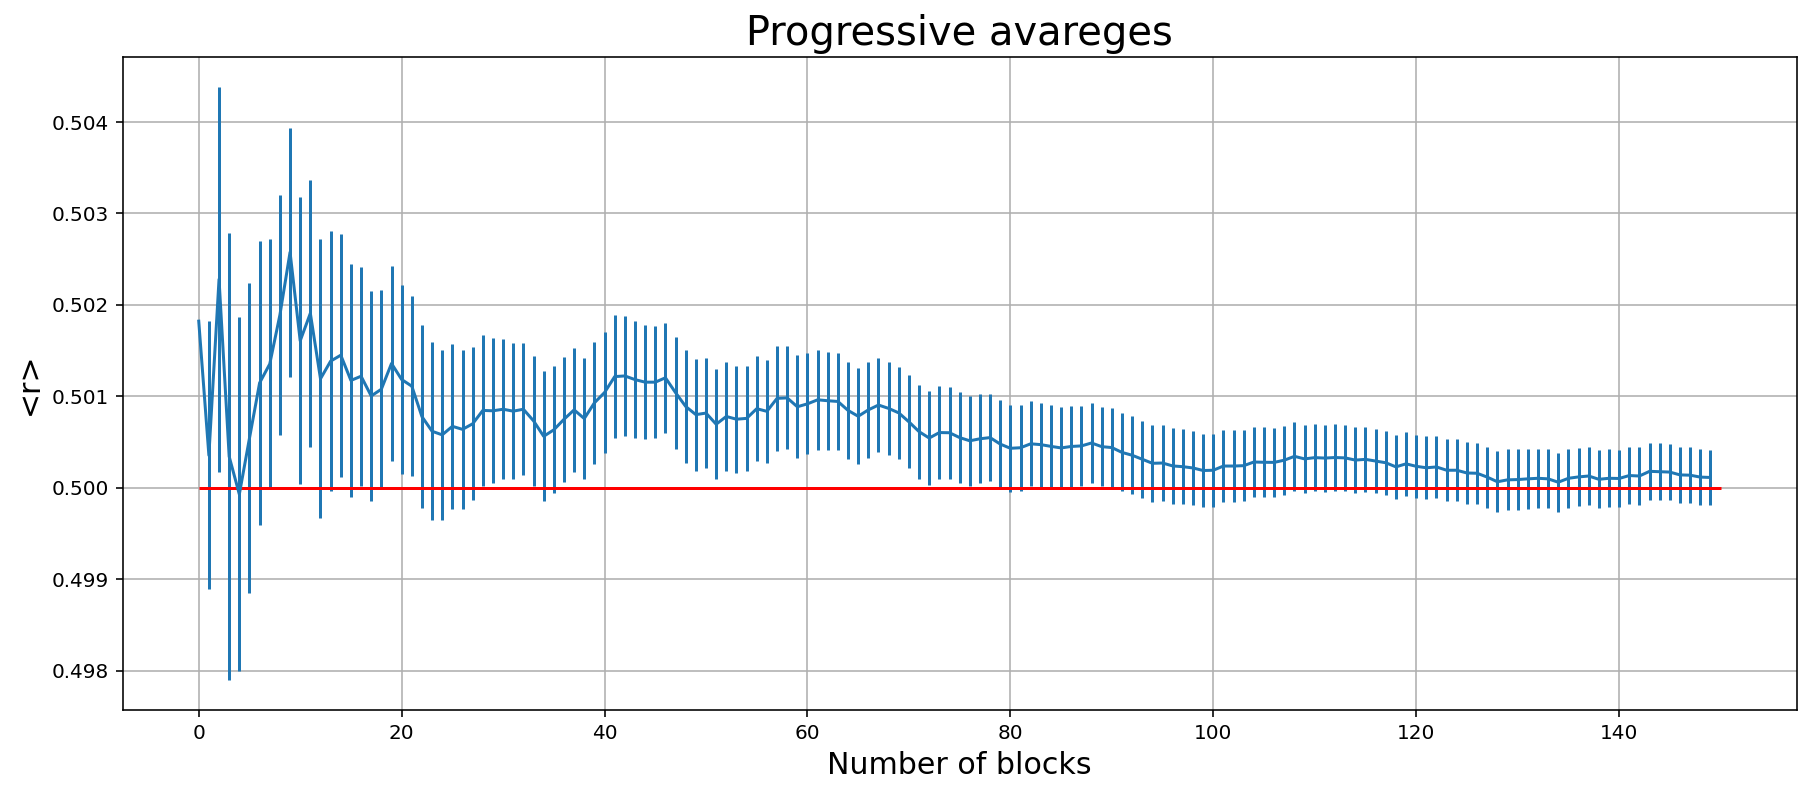

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

%config InlineBackend.figure_format='retina'

data = pd.read_csv("Esercizio_1_1/avereges.csv", header=None)
x = np.arange(0,150,1);
fig, ax=plt.subplots(figsize=(15,6))
ax.errorbar(x, data[0], yerr=data[1])
ax.hlines(0.5,0,150, color='red')
ax.grid(True)
ax.set_xlabel("Number of blocks", fontsize=15)
ax.set_ylabel("<r>", fontsize=15)
ax.set_title("Progressive avareges", fontsize=20)

I dati utilizzati per il grafico riportato in figura sono stati prodotti con $10^{6}$ estrazioni, divise in $150$ blocchi. L'errore è stato calcolato come esposto precedentemente. Sulla prima misura, dato che si tratta di una sola estrazione è stato posto l'errore statistico a 0.

Si può osservare che, al crescere del numero di blocchi considerati, la media progressiva si assesta attorno al valore atteso (linea rossa) e che l'errore stimato rende compatibile il dato osservato con il dato atteso.  

**Verifica dei valori di $\sigma^{2}$**

La varianza del generatore viene calcolata come $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Anche in questo caso procediamo con lo stesso metodo usato al punto precedente: per ogni blocco calcoliamo la varianza, andiamo poi a valutare le medie progressive e l'errore commesso su di esse.

Di seguito riporto le medie progressive ottenute e la loro incertezza. Sono stati usati gli stessi parametri, M, N ed L per il data blocking, ponendo l'errore statistico sulla prima misura pari a 0.

Text(0.5, 1.0, 'Progressive avareges')

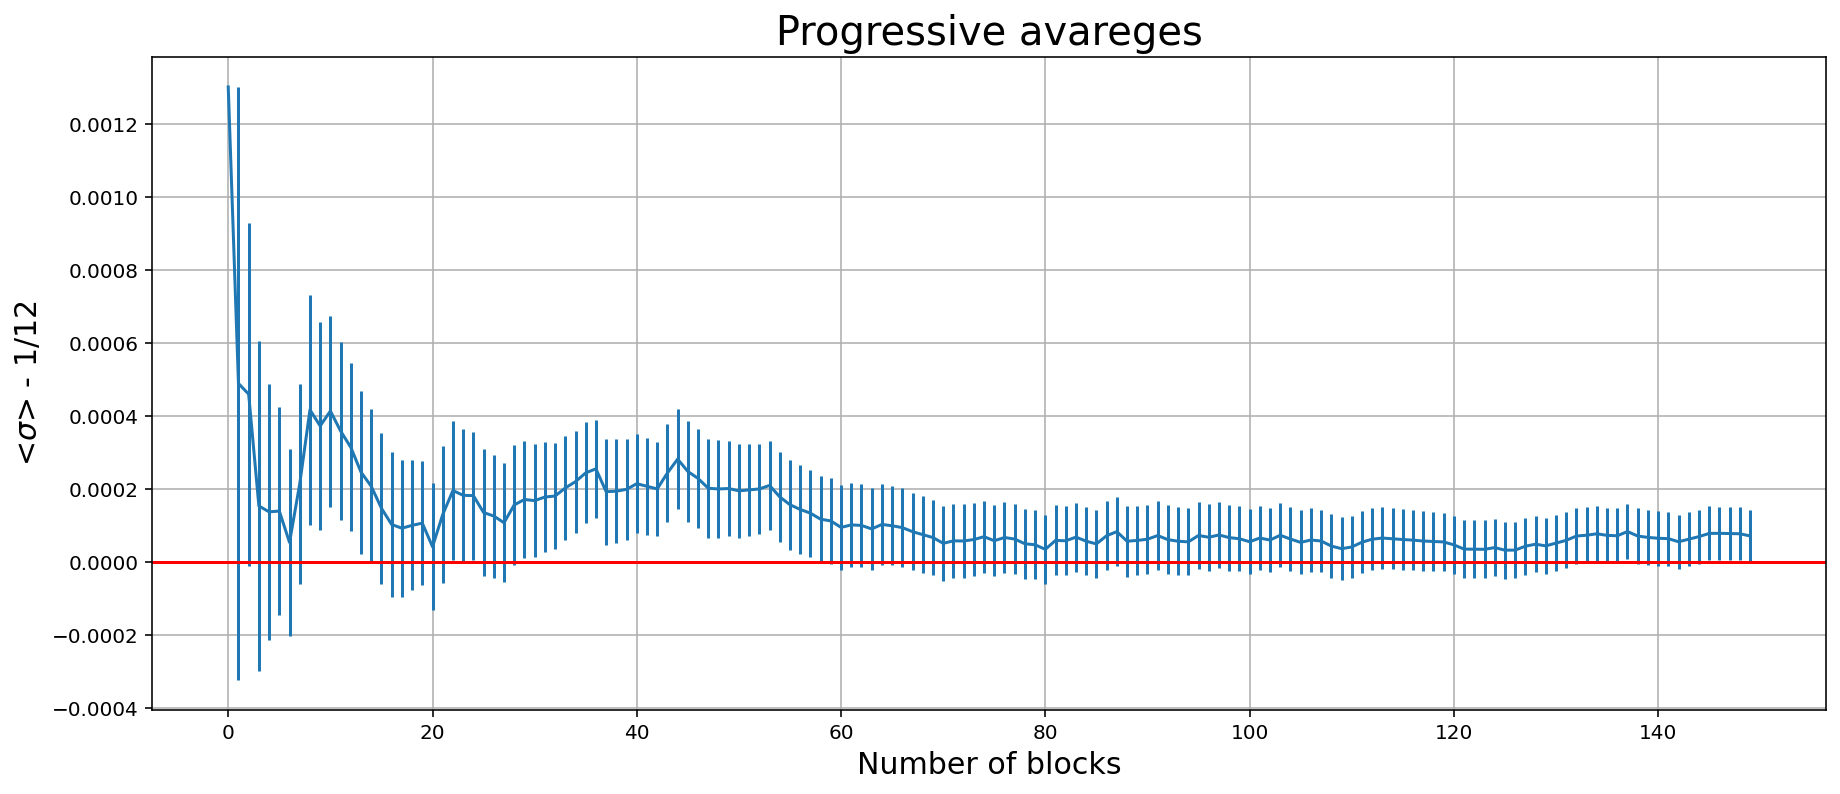

In [2]:
data = pd.read_csv("Esercizio_1_1/sigma.csv", header=None)
fig, ax=plt.subplots(figsize=(15,6))
ax.errorbar(x, data[0]-1/12, yerr=data[1])
ax.grid(True)
ax.axhline(y=0, color='red')
ax.set_xlabel("Number of blocks", fontsize=15)
ax.set_ylabel("<$\sigma$> - 1/12", fontsize=15)
ax.set_title("Progressive avareges", fontsize=20)

Per comodità, in questo caso è stata riportata in figura la differenza tra valori medi della varianza e valore atteso, così da far oscillare i risultati attorno allo 0 (linea rossa). Come nel caso della media si osserva che le oscillazioni si assestano attorno al valore atteso, la cui compatibilità con i risultati è confermata dalla stima dell'incertezza statistica.

**Test del $\chi^{2}$**

I risultati fin qui ottenuti sono confortanti per affermare che $r$ sia estratto da una distribuzione uniforme, infatti presenta le caratteristiche richieste. Tuttavia, in statistica, non è possibile avere la prova che la distribuzione da cui viene estratto $r$ sia quella da noi ipotizzata. È possibile, invece, affermare il contrario: possiamo valutare la probabilità che la distribuzione da cui viene estratto il nostro numero casuale **non** sia quella che abbiamo assunto. Se tale probabilità è bassa, allora possiamo accettare l'ipotesi fatta all'inizio. Lo strumento utilizzato per valutare questa probabilità è il **$\chi^{2}$**.

$$\chi^{2} = \sum_{i} \frac{\left(O_{i} - E_{i}\right)^{2}}{\sigma^{2}}$$

Come si può osservare, il $\chi^{2}$ misura lo scarto quadratico tra il valore ottenuto $O_{i}$ e il valore atteso $E_{i}$ con la varianza della distribuzione. Se la distribuzione scelta è sbagliata i valori di $\chi^{2}$ saranno più grandi.

**N.B.:** la probabilità di avere $k$ successi, ognuno con probabilità $p$, su $n$ lanci è data dalla distribuzione binomiale $$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$ che ha $\sigma^2 = np (1-p)$. Se $p$ è piccola segue che $\sigma^2 \simeq np$, ovvero tende al valore atteso. Per questo, posso sostituire $\sigma^{2}$ con $E_{i}$ nella definizione di $\chi^{2}$ (ciò permette il calcolo di un elemento in meno).

Di seguito presentiamo un **test del $\chi^{2}$** sui dati ottenuti dal data blocking, assumendo che siano estratti da una distribuzione uniforme tra $\left[0,1\right]$. Per fare ciò abbiamo diviso l'intervallo in $M=100$ sotto-intervalli. Abbiamo poi conteggiato su $n = 10^{4}$ estrazioni quante cadono in ogni sotto-intervallo. Infine abbiamo potuto calcolare il $\chi^{2}$: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
dove $n_{i}$ indica il conteggio ottenuto su ogni sotto-intervallo e $\frac{n}{M}$ è il valore atteso assumendo distribuzione uniforme. Questa procedura è stata ripetuta 100 volte. Ci aspettiamo valori che oscillino intorno a $\chi^2 = 100$.

Text(0.5, 1.0, '$\\chi^{2}$')

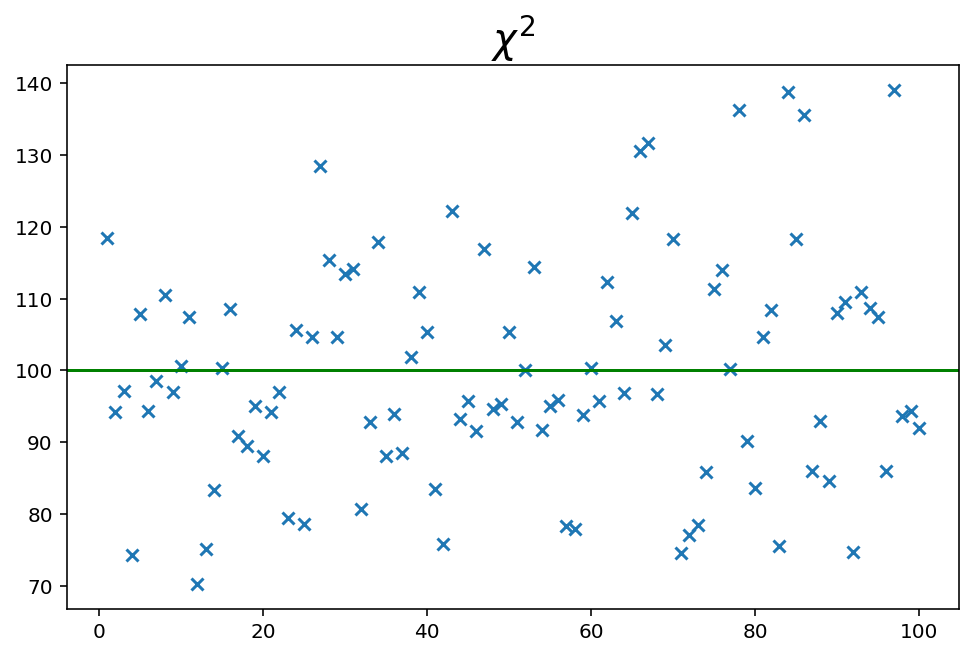

In [3]:
data = pd.read_csv("Esercizio_1_1/chi.csv", header = None)

fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(1,101,1)
ax.scatter(x,data[0],marker='x')
ax.axhline(100, color="green")
ax.set_title("$\chi^{2}$", fontsize = 20)

Dallo scatter plot riportato sopra osserviamo che i valori, come ci aspettavamo, oscillano attorno a 100. Chiaramente, ci sono realizzazioni migliori, che presentano valori pari a 70 e altre peggiori (valori attorno a 135). Dalle tabelle che riportano i livelli di confidenza in funzione dei gradi di libertà, in questo caso 99, si osserva che valori di $\chi^{2}\leq 140$ ci permettono di rigettare l'ipotesi negativa e quindi possiamo assumere che la distribuzione da cui abbiamo estratto i dati sia quella uniforme.

È infine interessante osservare come le estrazioni non siano realmente casuali in quanto il generatore è deterministico. Tuttavia l'algoritmo riesce a replicare bene il comportamento di estrazione di numeri casuali tanto che, anche dal punto di vista statistico, veniamo "ingannati" e possiamo procedere nel suo utilizzo con anche un secondo vantaggio: il fatto che i numeri siano pseudo-casuali, invece che realmente casuali, rende le simulazioni replicabili e confrontabili.

### Esercizio 01.2 - Verifica del teorema del limite centrale (TLC)
Di seguito mostreremo la validità del **teorema del limite centrale**. In particolare estrarremo numeri secondo diverse distribuzioni di probabilità con varianza finita e vedremo come le somme di queste estrazioni si distribuisce convergendo a una distribuzione gaussiana. Oltre a questo mostreremo che per per la distribuzione di Lorentz non vale il teorema del limite centrale in quanto non ha varianza finita e che le somme di dati estratti da tale distribuzione sono distribuite in maniera lorentziana.

**Campionamento di una distribuzione esponenziale**

Per il campionamento della distribuzione esponenziale, $p(x) = \lambda exp(-\lambda x)$, $x\in [0,+\infty]$, usiamo il metodo dell'inversione della distribuzione cumulativa. Questo metodo permette di ottenere una funzione che, a partire da un numero distribuito uniformemente tra $0$ e $1$, si ottenga un numero distribuito in maniera esponenziale tra $0$ e $+\infty$. Sia
$$F\left(x\right) = \int_{0}^{x}\lambda e^{-\lambda y}\,dy = 1 - e^{-\lambda x}$$

Invertendo si ottiene:
$$x = -\frac{1}{\lambda}log(1-F)$$
dove $F$ è un numero estratto in maniera uniforme tra $0$ e $1$.

**Campionamento di una distribuzione di Cauchy-Lorentz**

Usando lo stesso metodo scriviamo:
$$F\left(x\right) = \int_{-\infty}^{x} \frac{1}{\pi}\frac{\Gamma}{(y-\mu)^2+\Gamma^2}\,dy = \frac{1}{\pi} \arctan{\frac{\left(x-\mu\right)}{\Gamma}} + \frac{1}{2}$$
da cui 
$$x = \mu + \Gamma\pi\tan{(F - \frac{1}{2})}$$
Anche in questo caso $F$ è un numero estratto uniformemente da una distribuzione uniforme tra $0$ e $1$.

Di seguito viene presentata l'evoluzione della distribuzione della variabile $S_{N} = \frac{1}{N}\sum_{i=1}^{N}x_{i}$ dove le $x_{i}$ sono campionate a partire dalla medesima distribuzione di probabilità. Ci aspettiamo che la distribuzione di $S_{N}$ converga a una distribuzione gaussiana al crescere di N. Per ogni tipo di distribuzione delle $x_{i}$, vengono calcolati $10^{4}$ valori di $S_{N}$ per $N = \{1, 2, 10, 100\}$

In [4]:
from scipy import stats as scp

data_1 = pd.read_csv("Esercizio_1_2/Dati/1_sampl.csv", header=None)
data_2 = pd.read_csv("Esercizio_1_2/Dati/2_sampl.csv", header=None)
data_10 = pd.read_csv("Esercizio_1_2/Dati/10_sampl.csv", header=None)
data_100 = pd.read_csv("Esercizio_1_2/Dati/100_sampl.csv", header=None)

#### Distribuzioni uniforme e esponenziale

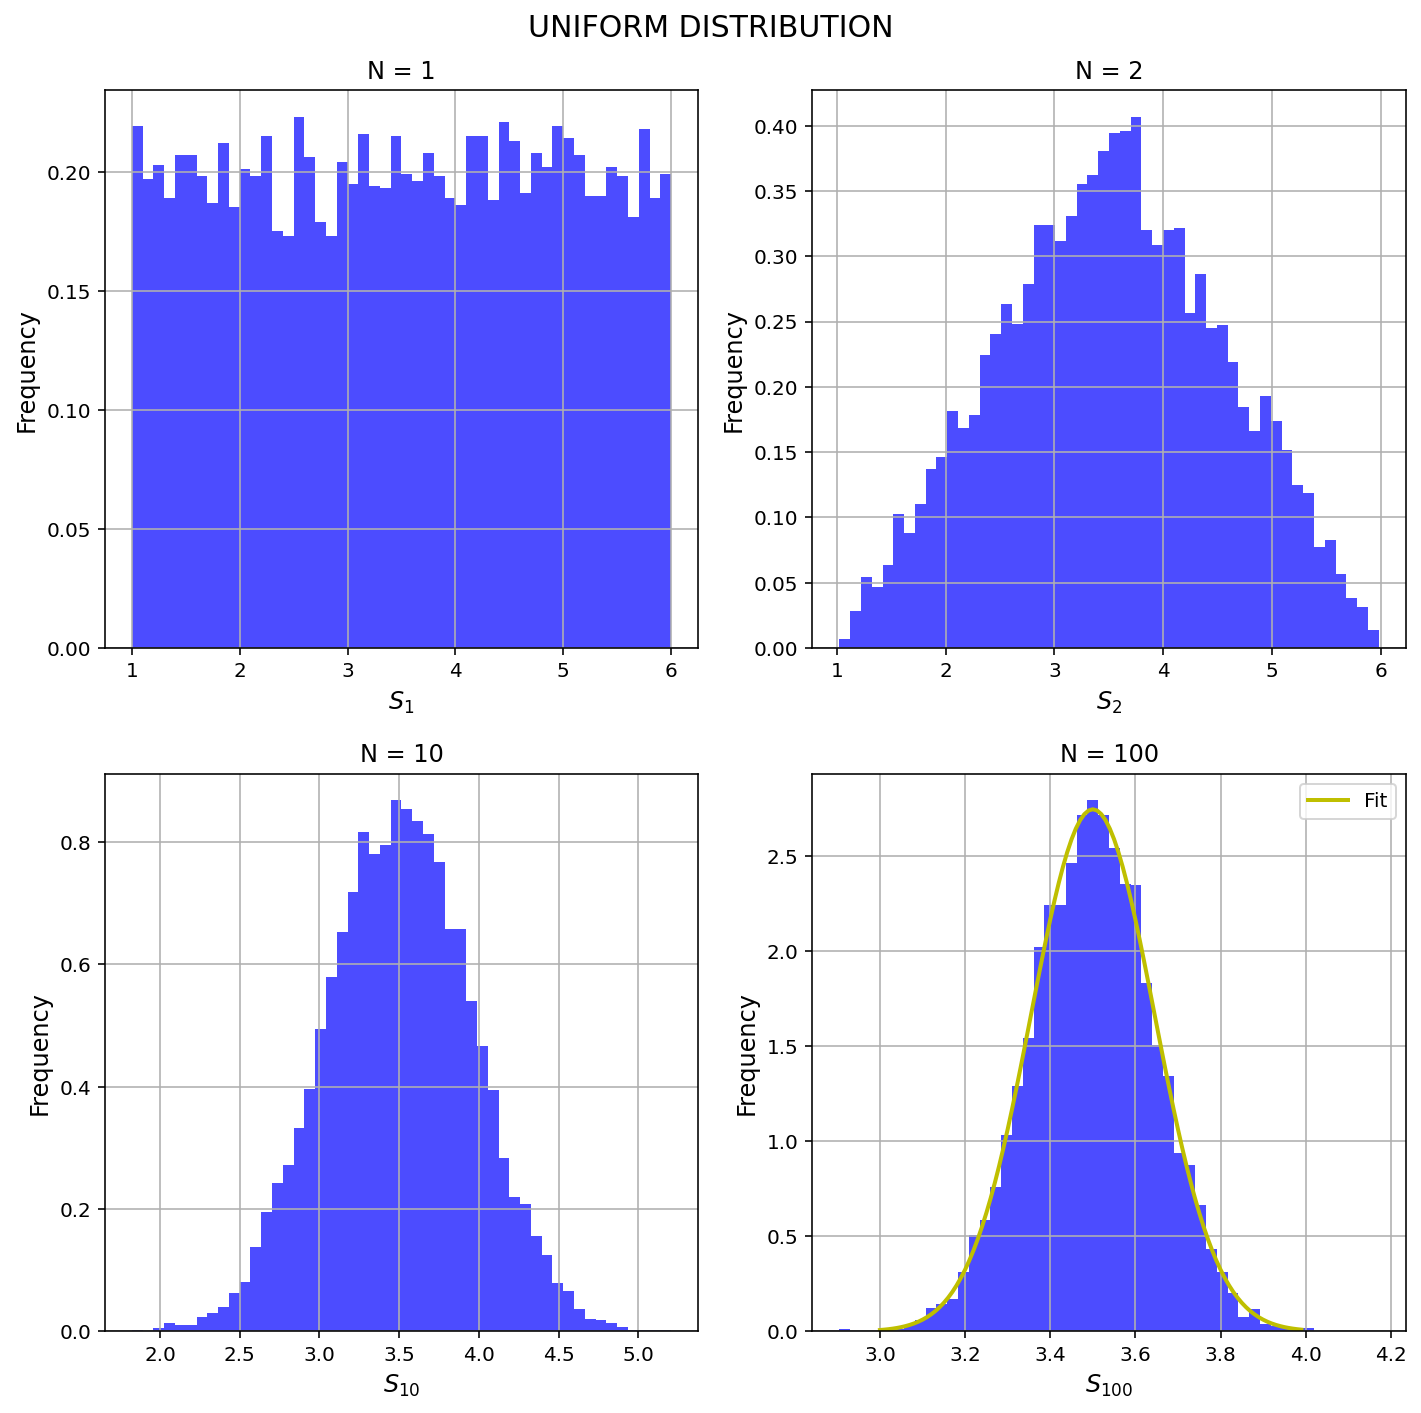

Parametri fit Gaussiano per N=100:
 mean = 3.50
 sigma = 0.15


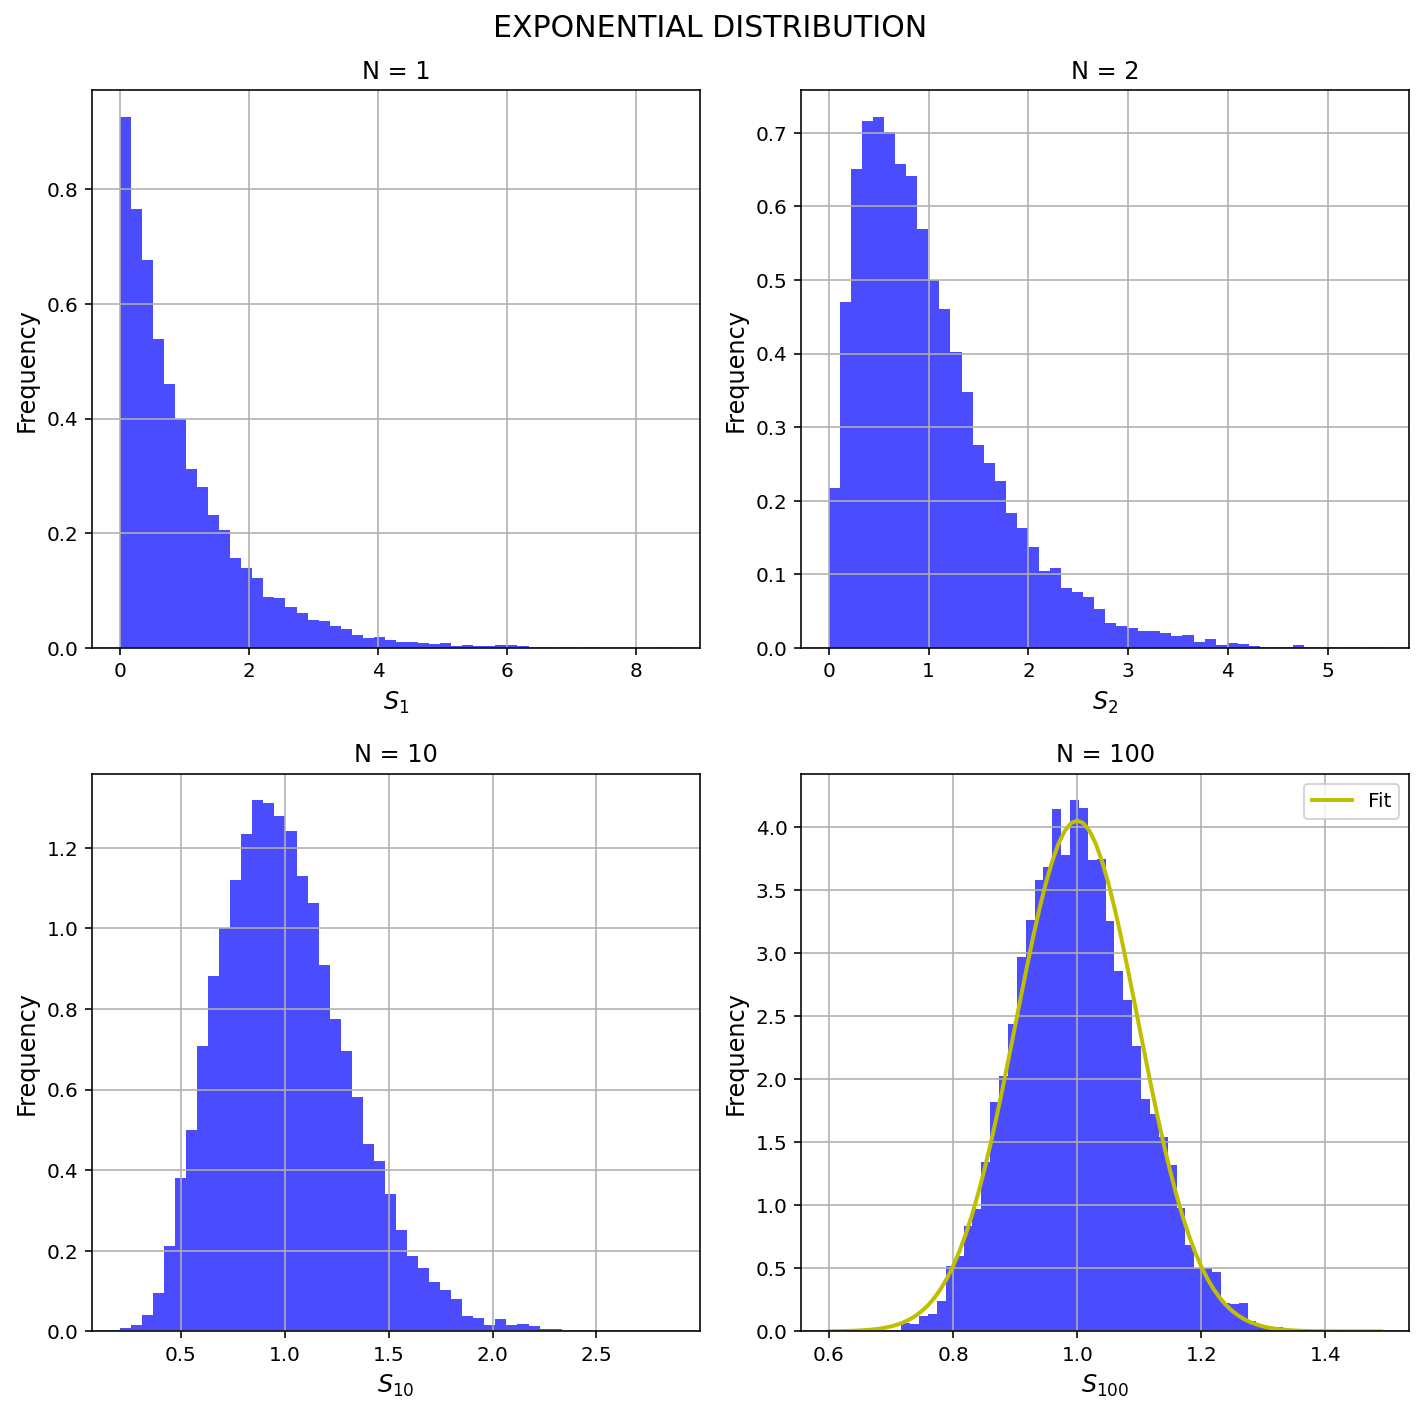

Parametri fit Gaussiano per N=100:
 mean = 1.00
 sigma = 0.10


In [5]:
N = [1,2,10,100]
unif = [data_1[0], data_2[0], data_10[0], data_100[0]]

fig, ax1 = plt.subplots(2,2, figsize=(10,10))
ax1 = ax1.reshape(-1)

fig.suptitle('UNIFORM DISTRIBUTION', fontsize = 15)

for i in range(4):
    ax1[i].hist(unif[i],bins=50, density = True, color = 'blue', alpha=0.7)
    ax1[i].set_title(f'N = {N[i]}')
    ax1[i].set_xlabel(r'$S_{'f'{N[i]}'r'}$',fontsize = 12)
    ax1[i].set_ylabel('Frequency',fontsize = 12)
    ax1[i].grid()
 
mu, sigma = scp.norm.fit(unif[3])
x = np.arange(3,4,0.01)
y = scp.distributions.norm.pdf(x,mu,sigma)
ax1[3].plot(x,y, color = 'y', linewidth=2, label = 'Fit')
ax1[3].legend()
fig.tight_layout()

plt.show()

print("Parametri fit Gaussiano per N=100:")
print(" mean =", '{0:.2f}'.format(mu))
print(" sigma =", '{0:.2f}'.format(sigma))

exp = [data_1[1], data_2[1], data_10[1], data_100[1]]

fig, ax2 = plt.subplots(2,2, figsize=(10,10))
ax2 = ax2.reshape(-1)

fig.suptitle('EXPONENTIAL DISTRIBUTION', fontsize = 15)

for i in range(4):
    ax2[i].hist(exp[i],bins=50, density = True, color = 'blue', alpha=0.7)
    ax2[i].set_title(f'N = {N[i]}')
    ax2[i].set_xlabel(r'$S_{'f'{N[i]}'r'}$',fontsize = 12)
    ax2[i].set_ylabel('Frequency',fontsize = 12)
    ax2[i].grid()

mu, sigma = scp.norm.fit(exp[3])
x = np.arange(0.6,1.5,0.01)
y = scp.distributions.norm.pdf(x,mu,sigma)
ax2[3].plot(x,y, color = 'y', linewidth=2, label = 'Fit')
ax2[3].legend()
fig.tight_layout()

plt.show()

print("Parametri fit Gaussiano per N=100:")
print(" mean =", '{0:.2f}'.format(mu))
print(" sigma =", '{0:.2f}'.format(sigma))

Come è possibile vedere dalle distribuzioni riportate in figura, sia per i dati estratti da distribuzione uniforme che da distribuzione esponenziale, la distribuzione delle somme $S_{N}$ converge alla distribuzione gaussiana, confermando la validità del TLC.

#### Distribuzione di Cauchy

In questo caso viene meno un'ipotesi del teorema del limite centrale, ovvero che la distribuzione abbia varianza finita. Dunque, il TLC non è più valido, tuttavia si può dimostrare che in questo caso la distribuzione delle $S_{N}$ converge ancora a una distribuzione di Cauchy. Noi mostriamo tale convergenza numericamente, variano il valore di $N$ come già fatto nei casi precedenti.

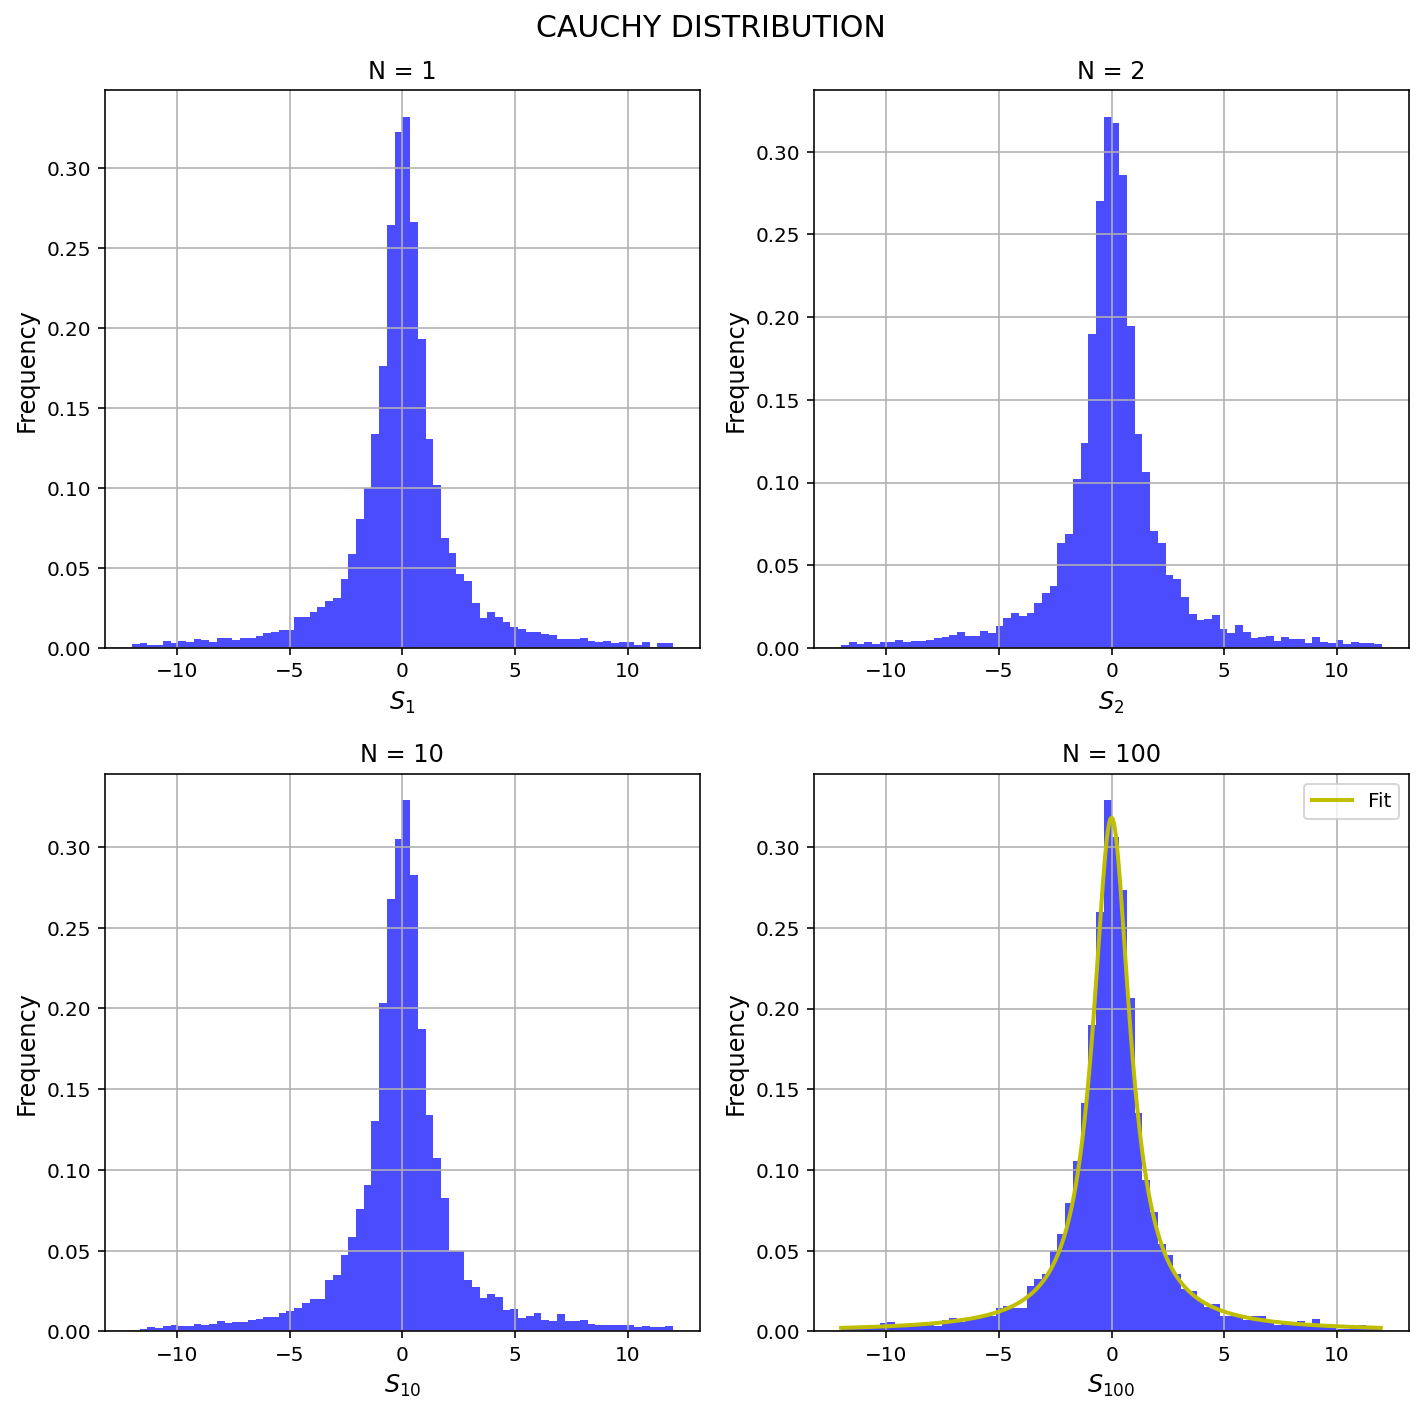

Parametri fit Lorentziano per N=100:
 mean = -0.01
 gamma = 1.00


In [8]:
N = [1,2,10,100]
lorentz = [data_1[2], data_2[2], data_10[2], data_100[2]]

fig, ax3 = plt.subplots(2,2, figsize=(10,10))
ax3 = ax3.reshape(-1)

fig.suptitle('CAUCHY DISTRIBUTION', fontsize = 15)

for i in range(4):
    ax3[i].hist(lorentz[i],bins=70, density = True, color = 'blue', alpha=0.7, range=(-12,12))
    ax3[i].set_title(f'N = {N[i]}')
    ax3[i].set_xlabel(r'$S_{'f'{N[i]}'r'}$',fontsize = 12)
    ax3[i].set_ylabel('Frequency',fontsize = 12)
    ax3[i].grid()

loc, scale = scp.cauchy.fit(lorentz[3])
x = np.arange(-12,12,0.05)
y = scp.distributions.cauchy.pdf(x,0,1)
ax3[3].plot(x,y, color = 'y', linewidth=2, label = 'Fit')
ax3[3].legend()
fig.tight_layout()

plt.show()

print("Parametri fit Lorentziano per N=100:")
print(" mean =", '{0:.2f}'.format(loc))
print(" gamma =", '{0:.2f}'.format(scale))

Come si può osservare dagli istogrammi riportati appena sopra, le somme di variabili distribuite in maniera lorentziana si distribuiscono ancora in maniera lorentziana.

### Esperimento di Buffon

L'esperimento di Buffon prevede la simulazione di un grande numero di lanci casuali di uno spaghetto di lunghezza *L* su un piano con linee orizzontali distanti *d* l'una dall'altra. Contando il numero di volte che questo spagetto interseca le linee del piano si può avere una stima del valore di $\pi$. In particolare: $$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d},$$
dove $P$ indica la probabilità che l'evento *intersezione spaghetto-linea* si verifichi e può essere stimata come il rapporto $\frac{N_{thr}}{N_{hit}}$. Facciamo notare che $d>L$ ma non $d\gg L$ altrimenti $P\ll 1$. 

Per simulare l'esperimento procediamo nel seguente modo. Innanzitutto poniamo $d=1$ e prendiamo $L<1$, fissato; fissiamo poi la posizione $y_{0}$ del punto medio dello spaghetto tra le due linee orizzontale; infine, guardiamo se la proiezione sull'asse *y* interseca le linee.

![alt text](buffon1.jpeg)

Come si può vedere dal disegno, se $y_{0} + L\sin(\theta) > d$ o $y_{0} + L\sin(\theta) < 0$ lo spaghetto interseca la linea. $\theta \in [0,\pi]$, ma, dal momento che $\pi$ è proprio il valore che vogliamo calcolare, valutiamo l'angono col seguente metodo:
- vengono estratti $x \in [-1,1]$, $y \in [0,1]$, rispettando la condizione che $x^{2} + y^{2} < 1$ (devo rimanere internamente alla circonferenza unitaria),
- $\sin(\theta) = \frac{y}{\sqrt{x^{2} + y^{2}}}$

Text(0.5, 1.0, 'Progressive avareges')

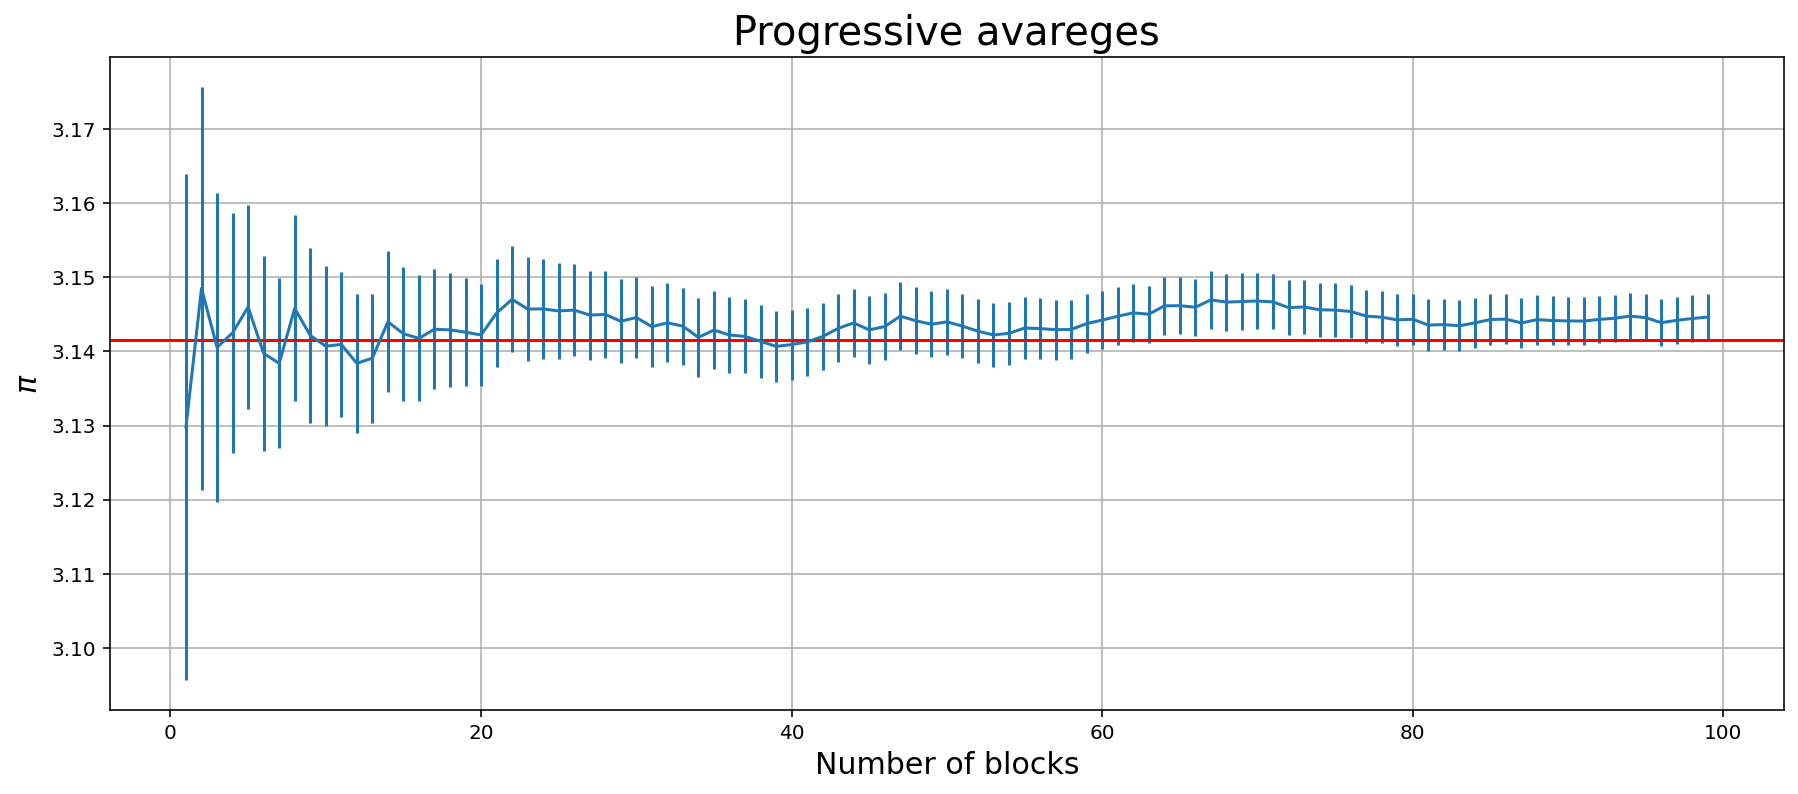

In [10]:
import math as mat

data = pd.read_csv("Esercizio_1_3/pi_value.csv", header = None)

x = np.arange(0,100)

fig, ax=plt.subplots(figsize=(15,6))
ax.errorbar(x,data[0], yerr=data[1])
ax.axhline(mat.pi, color="red")
ax.grid(True)
ax.set_xlabel("Number of blocks", fontsize=15)
ax.set_ylabel("$\pi$", fontsize=15)
ax.set_title("Progressive avareges", fontsize=20)

Il grafico sopra riportato è stato ottenuto simulando $10^{6}$ lanci divisi su $100$ blocchi, dai quali è stato ricavato il valore di $\pi$ come descritto precedentemente. Si può osservare che al crescere dei blocchi considerati la media progressiva di $\pi$ si assesta attorno al valore atteso.